In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from math import factorial
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
vehicles = pd.read_csv('/Users/bnutw/DS_items/GitHub/project_4/vehicles_us.csv')
 
vehicles.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [3]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
duplicates = vehicles[vehicles.duplicated()]
duplicates

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [5]:
vehicles.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [6]:
vehicles['model_year'].fillna(0, inplace=True)
vehicles['cylinders'].fillna(0, inplace=True)
vehicles['odometer'].fillna(0, inplace=True)
vehicles['paint_color'].fillna('not available', inplace=True)
vehicles['is_4wd'].fillna(0, inplace=True)
vehicles['is_4wd'] = vehicles['is_4wd'].map({1.0: 'yes', 0.0: 'no'})

vehicles.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [7]:
vehicles.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,not available,yes,2018-06-23,19
1,25500,0.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,yes,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,no,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,0.0,automatic,pickup,not available,no,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,no,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,yes,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,no,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,yes,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,not available,yes,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,0.0,gas,147191.0,automatic,SUV,blue,yes,2019-02-15,17


In [8]:
vehicles['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [9]:
make_model = vehicles['model'].str.split(' ', n=1, expand=True)
make_model = make_model.rename(columns={0: 'make', 1: 'model'})
make_model

,make,model
0,bmw,x5
1,ford,f-150
2,hyundai,sonata
3,ford,f-150
4,chrysler,200
...,...,...
51520,nissan,maxima
51521,honda,civic
51522,hyundai,sonata
51523,toyota,corolla


In [10]:
vehicles = vehicles.drop('model', axis=1)
vehicles

,price,model_year,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,good,6.0,gas,145000.0,automatic,SUV,not available,yes,2018-06-23,19
1,25500,0.0,good,6.0,gas,88705.0,automatic,pickup,white,yes,2018-10-19,50
2,5500,2013.0,like new,4.0,gas,110000.0,automatic,sedan,red,no,2019-02-07,79
3,1500,2003.0,fair,8.0,gas,0.0,automatic,pickup,not available,no,2019-03-22,9
4,14900,2017.0,excellent,4.0,gas,80903.0,automatic,sedan,black,no,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,like new,6.0,gas,88136.0,automatic,sedan,black,no,2018-10-03,37
51521,2700,2002.0,salvage,4.0,gas,181500.0,automatic,sedan,white,no,2018-11-14,22
51522,3950,2009.0,excellent,4.0,gas,128000.0,automatic,sedan,blue,no,2018-11-15,32
51523,7455,2013.0,good,4.0,gas,139573.0,automatic,sedan,black,no,2018-07-02,71


In [11]:
vehicles_info = pd.concat([make_model, vehicles], axis=1)

In [12]:
vehicles_info

,make,model,price,model_year,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,bmw,x5,9400,2011.0,good,6.0,gas,145000.0,automatic,SUV,not available,yes,2018-06-23,19
1,ford,f-150,25500,0.0,good,6.0,gas,88705.0,automatic,pickup,white,yes,2018-10-19,50
2,hyundai,sonata,5500,2013.0,like new,4.0,gas,110000.0,automatic,sedan,red,no,2019-02-07,79
3,ford,f-150,1500,2003.0,fair,8.0,gas,0.0,automatic,pickup,not available,no,2019-03-22,9
4,chrysler,200,14900,2017.0,excellent,4.0,gas,80903.0,automatic,sedan,black,no,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,nissan,maxima,9249,2013.0,like new,6.0,gas,88136.0,automatic,sedan,black,no,2018-10-03,37
51521,honda,civic,2700,2002.0,salvage,4.0,gas,181500.0,automatic,sedan,white,no,2018-11-14,22
51522,hyundai,sonata,3950,2009.0,excellent,4.0,gas,128000.0,automatic,sedan,blue,no,2018-11-15,32
51523,toyota,corolla,7455,2013.0,good,4.0,gas,139573.0,automatic,sedan,black,no,2018-07-02,71


In [13]:
(vehicles['model_year'].min(),vehicles['model_year'].max())

(0.0, 2019.0)

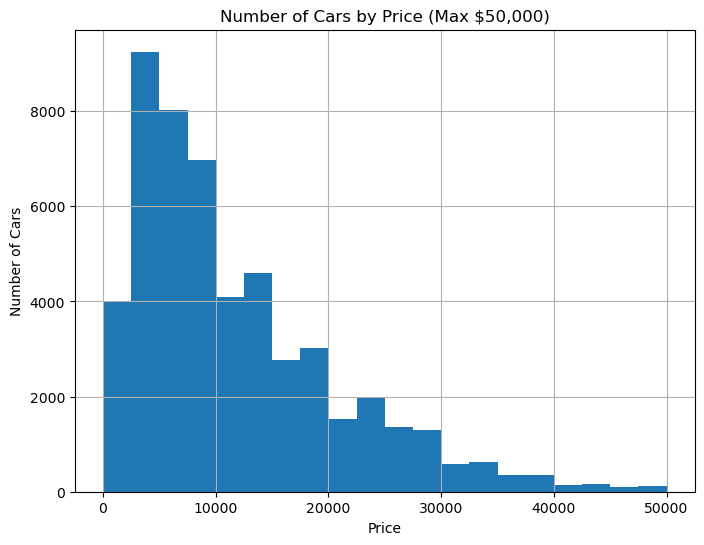

In [20]:
prices_below_50k = vehicles[vehicles['price'] < 50000]['price']

plt.figure(figsize=(8, 6))
plt.hist(prices_below_50k, bins=20)
plt.title('Number of Cars by Price (Max $50,000)')
plt.xlabel('Price')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

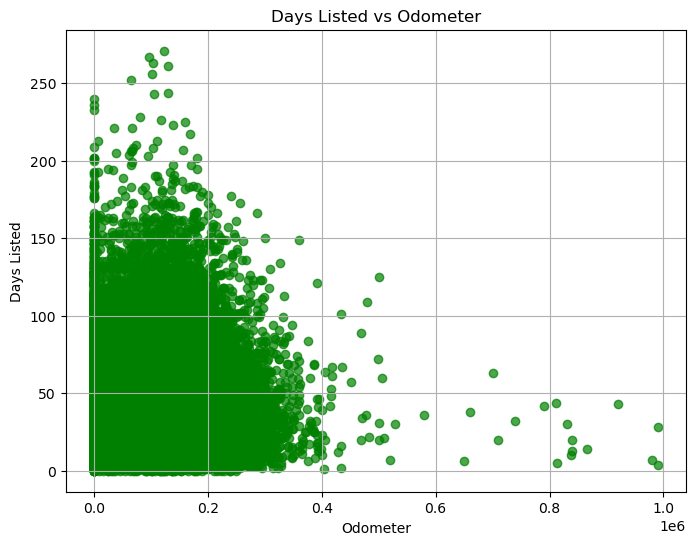

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(vehicles['odometer'], vehicles['days_listed'], color='green', alpha=0.7)
plt.title('Days Listed vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Days Listed')
plt.grid(True)
plt.show()